In [4]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

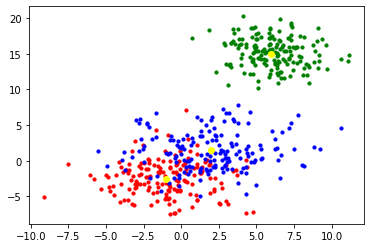

In [58]:
#Generating a dataset made of clusters to work on

centers = [(-1.0, -2.5), (2.0, 1.5),(6,15)]
cluster_std = [2.5, 2.8,2.0]
#made it a bit overlapping otherwise the votes would go very close to one

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=3,random_state=42)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")
plt.scatter([x[0] for x in centers], [y[1] for y in centers], c="yellow")

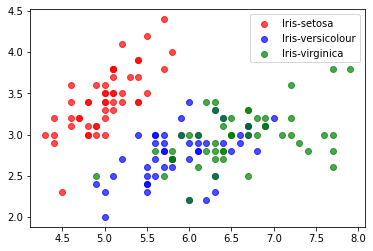

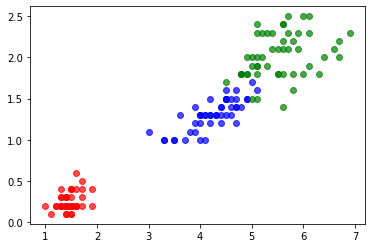

In [123]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[y== 0, 0], X[y == 0, 1], c = 'red', alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'blue', alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c = 'green', alpha=0.7, label = 'Iris-virginica')
plt.legend()
plt.show()
plt.scatter(X[y== 0, 2], X[y == 0, 3], c = 'red', alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], c = 'blue', alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y == 2, 2], X[y == 2, 3], c = 'green', alpha=0.7, label = 'Iris-virginica')

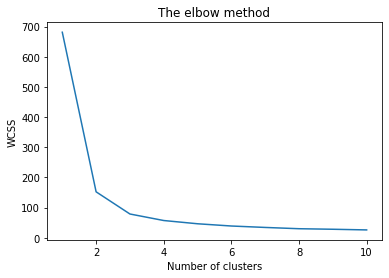

In [104]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
threshold = 0.9;
 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#The optimum number of clusters is found where the within cluster sum of squares (inertia)
#won't decrease significantly on any next iteration. In this case,
#3 seems the ideal number of clusters

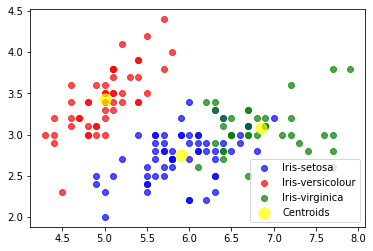

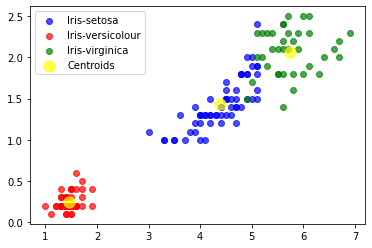

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [124]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)



#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'blue', alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', alpha=0.7, label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 125, alpha =0.7, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], c = 'blue', alpha=0.7, label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], c = 'red', alpha=0.7, label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], c = 'green', alpha=0.7, label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 125, alpha =0.7, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
kmeans.cluster_centers_

In [308]:
def kmeans_test_split(X,y, n_clusters):
    
    #this method returns:
    #X_train: a list of arrays composed of aggregated X values based on kmeans++ similarity
    #y_train: the corresponding target for each value in X_train
    
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10)
    y_kmeans = kmeans.fit_predict(X)
    
    X_train=[]
    y_train=[]
    
    for i in range(n_clusters):
        X_train.append(X[y_kmeans == i, :])
        y_train.append(y[y_kmeans==i])
    
    return X_train,y_train
    
    #please remember to give a second look to this as it seems tremendously wrong
    #also there's some confusion about classification as kmeans gets a random order

In [404]:
import numpy as np
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans

class CustomEstimator(BaseEstimator):
    
    def __init__(self, n_estimators, similarity_method, base_model):
        self.n_estimators = n_estimators
        self.similarity_method = similarity_method
        self.base_model = base_model
        
    
    def fit(self,X,y):
        
        X_train, y_train = kmeans_test_split(X,y,self.n_estimators)
        
        est_clf = []
        est_names = []
                
        for i in range(self.n_estimators):
            
            #each test set is fitted to a different classifier
            X_selected = X_train[i]
            y_selected = y_train[i]
            
            est_clf.append(DecisionTreeClassifier(max_depth=2).fit(X_selected, y_selected))
            est_names.append("model % s" % i) #necessary for the voting classifier to accept the estimators
        
        estimators = list(zip(est_names,est_clf))
            
        
        voting_clf = VotingClassifier(estimators = estimators, voting='hard')
        self.value_ = voting_clf.fit(X,y)
        
        return self
            
    
    def predict(self, X):
        out = self.value_.predict(X)
        return out
    
    def predict_proba(self):
        pass

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
a = CustomEstimator(3, 5, 'test')
clf = a.fit(X_train,y_train)
print("prediction:", a.predict(X_test),"\n    values:",y_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, a.predict(X_test)))



prediction: [1 0 2 0 0 1 2 2 2 0 2 0 0 2 2 1 0 2 1 1 2 0 0 0 1 0 0 0 0 2] 
    values: [1 0 2 0 0 1 2 2 1 0 2 0 0 1 2 1 0 2 1 1 2 0 0 0 1 0 0 0 0 2]
Accuracy: 0.9333333333333333
